# <center>Lab Machine Learning 3</center>

## <center>Souaybou Bagayoko</center>
### <center> Semester 2, Nr: 303189 </center>

 


### Data preprocessing  
1.1.1 Datasets
Airfare and demand: target − > price Wine Quality: target − > quality
Parkisons Dataset: target − > total UPDRS
You are required to pre-process the datasets.
1. Convert any non-numeric values to numeric values. For example you can replace a country name with an integer value or more appropriately use hot-one encoding. [Hint: use hashmap (dict) or pandas.get dummies]. Please explain your solution.


In [48]:
# importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

#### importing the data 
 Datasets Airfare and demand ---> Airfare_data
 price Wine Quality ------------> Wine_data
 quality Parkisons Dataset -----> Parkinson_data

In [49]:
# importing the datA 
 
air_colum = ['City1','City2','Average Fare 11-17','Distance','Average weekly passengers','market leading airline',\
            'market share 40-45','Average fare 48-54','Low price airline','markert share 61-66','price']
miss = ['-', 'na', 'Nan', 'nan', 'n\a', '?']
Airfare_data = pd.read_csv('airq402.data', delim_whitespace=True, names= air_colum, na_values=miss)

Parkinson_data = pd.read_csv('parkinsons_updrs.data')

Wine_data = pd.read_csv('winequality-red.csv', sep=';') # this is a semicolumn separedt file, therefor it 
                                                        # requires to set the delimiter = ';'

#### Converting non numerical values into numerical  

In [50]:
# in this case I will use the get_dommies methode to change the variable 
# let's creat a function that will check if the data set has column with ogject type 
# and return how many type does the column have  

In [51]:
from collections import Counter 
def dummy_check(df):
    for col in df.columns:
        if df[col].dtype=='object':
            yield col , Counter(df[col])

In [52]:
# I create a List containing all the data set to check
df_list = [Airfare_data, Parkinson_data, Wine_data] # 
# iterate over the generator 
for val in map(dummy_check,df_list):
    for v in val:
        print(f"Column \033[1;32m{v[0]} \033[1;m")
        print(v[1])

Column City1 
Counter({'ATL': 64, 'ORD': 63, 'DFW': 52, 'BWI': 47, 'BOS': 38, 'IAH': 38, 'LAS': 37, 'DEN': 36, 'DTW': 33, 'LAX': 31, 'FLL': 29, 'LGA': 28, 'MCI': 23, 'CLE': 22, 'AUS': 21, 'MSP': 20, 'ABQ': 18, 'CLT': 18, 'CMH': 18, 'PHX': 18, 'MCO': 17, 'MSY': 15, 'BDL': 14, 'MIA': 13, 'CVG': 12, 'IND': 12, 'OAK': 12, 'BNA': 11, 'PHL': 11, 'PDX': 11, 'BUR': 10, 'BUF': 9, 'STL': 9, 'ALB': 8, 'BHM': 8, 'BOI': 8, 'RSW': 8, 'ONT': 8, 'JAX': 7, 'MKE': 7, 'SLC': 7, 'ELP': 6, 'MEM': 6, 'SMF': 6, 'SAN': 6, 'ISP': 5, 'PVD': 5, 'RDU': 5, 'ACY': 4, 'GRR': 4, 'LGB': 4, 'SDF': 4, 'OMA': 4, 'SFO': 4, 'SJC': 4, 'SEA': 4, 'COS': 3, 'DAY': 3, 'GSO': 3, 'PSP': 3, 'MHT': 3, 'ORF': 3, 'PIT': 3, 'RNO': 3, 'SAT': 3, 'CAK': 2, 'AMA': 2, 'CRP': 2, 'DSM': 2, 'OKC': 2, 'TPA': 2, 'BTV': 1, 'CHS': 1, 'CAE': 1, 'EUG': 1, 'FNT': 1, 'GSP': 1, 'GPT': 1, 'HRL': 1, 'MDT': 1, 'TYS': 1, 'LIT': 1, 'MSN': 1, 'MYR': 1, 'PHF': 1, 'ROC': 1, 'SNA': 1, 'SYR': 1, 'TLH': 1, 'IAD': 1})
Column City2 
Counter({'TPA': 46, 'MCO': 43, 

In [53]:
# We notice that the the only non-numeric values are City1 , City2 , Market leading airline and low price airline 
# all our non-numeric columns are in the Airfare_data
Airfare_data.columns = Airfare_data.columns.str.replace(" ", "_")
dummy_data = pd.get_dummies(Airfare_data, columns=['City1' , 'City2' , 'market_leading_airline','Low_price_airline'],\
                            drop_first=True)
#here the keyword argument drop_firs specify that we want to drop the original column that has been hot-one encoded

We end up with a very spars data in the Airfare_data set

### Selecting usefull columns 

#### 1. For the Airfare and demand: target − > price  data set 

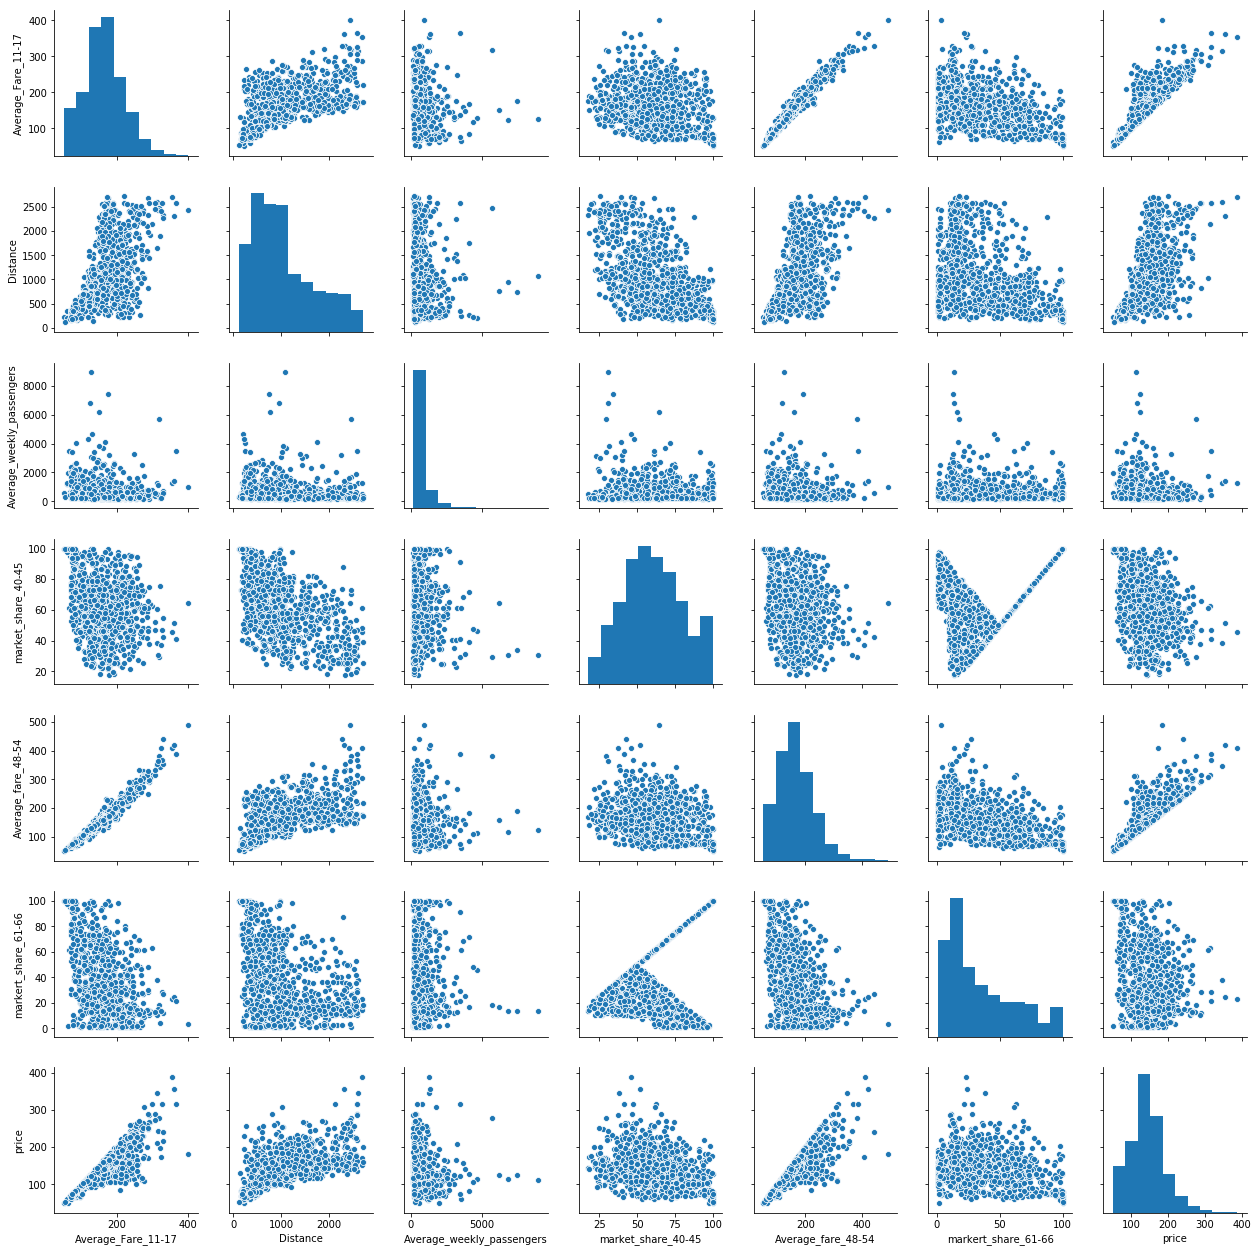

In [54]:
Air_num_columns = Airfare_data._get_numeric_data()
g = sns.pairplot(Air_num_columns)

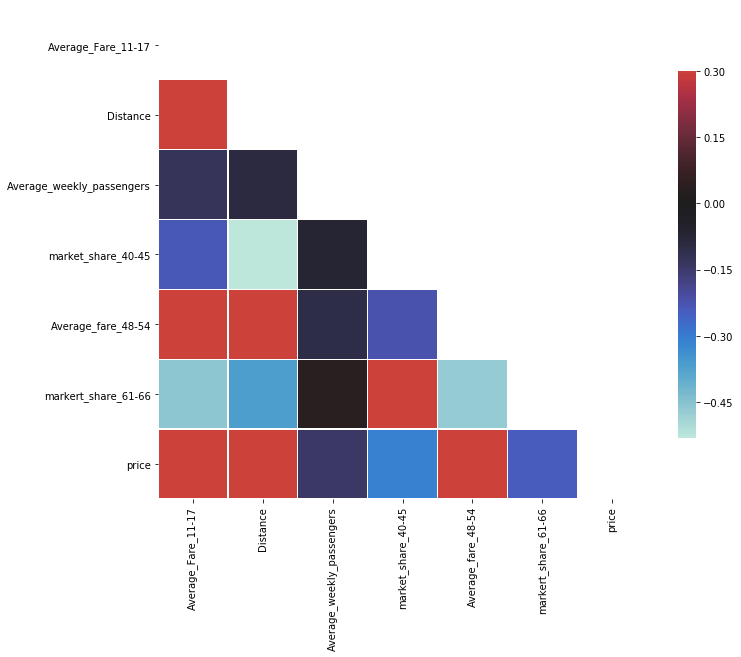

In [55]:
corr = Air_num_columns.corr()
mask = np.zeros_like(corr, dtype=np.bool) # creates matrice which contain the boolean value false
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu_indices.html 
mask[np.triu_indices_from(mask)] = True  # set the upper triangle part of the triangle to true

plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure

# Draw the heatmap with the mask and correct aspect ratio
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(Air_num_columns.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [56]:
# we an notice some correlation between the price and ['Averrage Fare 11-17','Averrage Fare 48-54','Distance']
# It is also noticeable that 'Averrage Fare 11-17' and 'Averrage Fare 48-54' have slightly the same linear 
# dependence with price, therefore we can drop one of the column column
Air_num_columns.corr()['Average_Fare_11-17']['Average_fare_48-54'] #show the correlation between these two columns 

0.9814623258822683

In [57]:
# By looking at the correlation matrix between price and the additional table in the Airfare_data 
# We notice That the correlation is very small. therefore I'll drop these columns as well 

In [58]:
price_dummies_column = dummy_data.iloc[:,6:]
price_dummies_column.corr()

,price,City1_ACY,City1_ALB,City1_AMA,City1_ATL,City1_AUS,City1_BDL,City1_BHM,City1_BNA,City1_BOI,...,Low_price_airline_G4,Low_price_airline_HP,Low_price_airline_NK,Low_price_airline_NW,Low_price_airline_SY,Low_price_airline_TZ,Low_price_airline_UA,Low_price_airline_US,Low_price_airline_WN,Low_price_airline_YX
price,1.000000,-0.031552,-0.014599,-0.045911,-0.022486,0.039770,-0.007617,-0.019496,-0.020969,-0.097966,...,-0.033829,0.134624,-0.060814,0.051567,-0.018297,-0.057155,0.108960,0.083681,-0.319557,0.049538
City1_ACY,-0.031552,1.000000,-0.005691,-0.002837,-0.016571,-0.009282,-0.007551,-0.005691,-0.006683,-0.005691,...,-0.002005,-0.015725,0.370714,-0.011707,-0.005321,-0.011889,-0.015289,-0.021241,-0.034635,-0.003476
City1_ALB,-0.014599,-0.005691,1.000000,-0.004020,-0.023482,-0.013152,-0.010701,-0.008065,-0.009471,-0.008065,...,-0.002841,-0.022283,-0.011451,-0.016589,-0.007540,-0.016848,-0.021665,0.007153,0.057616,-0.004926
City1_AMA,-0.045911,-0.002837,-0.004020,1.000000,-0.011706,-0.006556,-0.005334,-0.004020,-0.004721,-0.004020,...,-0.001416,-0.011108,-0.005708,-0.008270,-0.003759,-0.008398,-0.010800,-0.015005,0.028721,-0.002456
City1_ATL,-0.022486,-0.016571,-0.023482,-0.011706,1.000000,-0.038297,-0.031159,-0.023482,-0.027577,-0.023482,...,-0.008273,0.005034,-0.033344,-0.002562,-0.021955,-0.049057,-0.009319,0.020827,-0.142913,-0.014344
City1_AUS,0.039770,-0.009282,-0.013152,-0.006556,-0.038297,1.000000,-0.017452,-0.013152,-0.015446,-0.013152,...,-0.004634,-0.006505,-0.018676,0.051028,-0.012297,-0.027477,-0.035333,-0.049091,0.069108,-0.008034
City1_BDL,-0.007617,-0.007551,-0.010701,-0.005334,-0.031159,-0.017452,1.000000,-0.010701,-0.012567,-0.010701,...,-0.003770,-0.029567,-0.015195,-0.022012,-0.010005,-0.022355,-0.028747,0.044798,-0.024674,-0.006536
City1_BHM,-0.019496,-0.005691,-0.008065,-0.004020,-0.023482,-0.013152,-0.010701,1.000000,-0.009471,-0.008065,...,-0.002841,-0.022283,-0.011451,-0.016589,-0.007540,-0.016848,-0.021665,-0.030100,0.084290,-0.004926
City1_BNA,-0.020969,-0.006683,-0.009471,-0.004721,-0.027577,-0.015446,-0.012567,-0.009471,1.000000,-0.009471,...,-0.003337,-0.026169,-0.013448,-0.019482,-0.008855,-0.019786,0.016611,-0.003532,0.033490,-0.005785
City1_BOI,-0.097966,-0.005691,-0.008065,-0.004020,-0.023482,-0.013152,-0.010701,-0.008065,-0.009471,1.000000,...,-0.002841,0.025741,-0.011451,-0.016589,-0.007540,-0.016848,-0.021665,-0.030100,0.057616,-0.004926


In [59]:
#I will remove some redondant columns as to avoid linear dependancies between columns 

In [60]:
Airfare_columns = ['price','Distance', 'Average_Fare_11-17','market_share_40-45'] # selecting columns 
# I choose 'Averrage Fare 11-17' over'Averrage Fare 48-54' 
# same observation with market_share_40-45 and markert_share_61-66 
# to avoid linear depencies between columns I will choose market_share_40-45 with a -0.307672 over 
# markert_share_61-66 with -0.240186
print(Air_num_columns.corr()['price']['Average_Fare_11-17'])
print(Air_num_columns.corr()['price']['Average_fare_48-54'])
Airfare_train_data = Air_num_columns[Airfare_columns]

0.8664103374911558
0.8265105975217331


#### 2. For the Wine Quality: target − > quality 

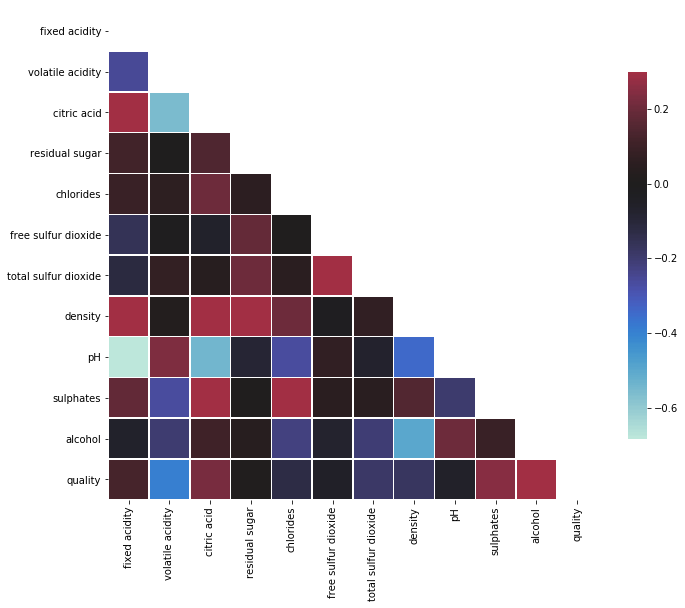

In [61]:

corr = Wine_data.corr()  # generate the cooreleation value between columns
mask = np.zeros_like(corr, dtype=np.bool) # creates matrice which contain the boolean value false
mask[np.triu_indices_from(mask)] = True  # set the upper triangle part of the triangle to true
plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
sns.heatmap(corr,annot=False, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [62]:
Wine_data[Wine_data.columns].corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [63]:
Wine_column = ['quality','fixed acidity','citric acid','sulphates','alcohol','volatile acidity','total sulfur dioxide']
Wine_train_data = Wine_data[Wine_column]

#### 3. For Parkisons Dataset: target − > total UPDRS 

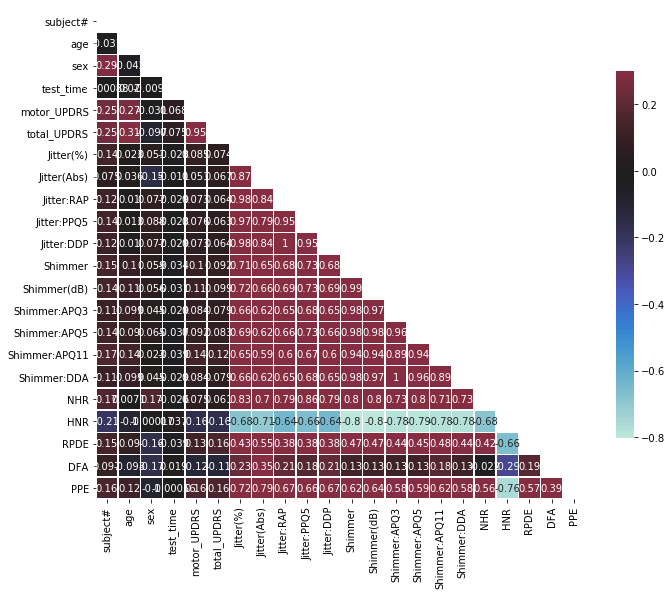

In [64]:
#Num_columns = Airfare_data._get_numeric_data()
corr = Parkinson_data.corr()  # generate the cooreleation value between columns
mask = np.zeros_like(corr, dtype=np.bool) # creates matrice which contain the boolean value false
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu_indices.html 
mask[np.triu_indices_from(mask)] = True  # set the upper triangle part of the triangle to true

plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
# Draw the heatmap with the mask and correct aspect ratio
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr,annot=True, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

In [65]:
# correlation values with respect to total_UPDRS
Parkinson_data[Parkinson_data.columns].corr()['total_UPDRS']

subject#         0.253643
age              0.310290
sex             -0.096559
test_time        0.075263
motor_UPDRS      0.947231
total_UPDRS      1.000000
Jitter(%)        0.074247
Jitter(Abs)      0.066927
Jitter:RAP       0.064015
Jitter:PPQ5      0.063352
Jitter:DDP       0.064027
Shimmer          0.092141
Shimmer(dB)      0.098790
Shimmer:APQ3     0.079363
Shimmer:APQ5     0.083467
Shimmer:APQ11    0.120838
Shimmer:DDA      0.079363
NHR              0.060952
HNR             -0.162117
RPDE             0.156897
DFA             -0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

In [66]:
Parkinson_columns = ['total_UPDRS','subject#','age','motor_UPDRS','RPDE','PPE','Shimmer:APQ11',\
                     'Shimmer(dB)','HNR']
Parkinson_train_data = Parkinson_data[Parkinson_columns]

### 3. Spliting the dataset into 80% Train set and 20% Test set.


In [67]:
def data_split(data, percentage, seed, index_reset=False):
    train = data.sample(frac=percentage/100, random_state=seed)
    tes = data.drop(train.index)
    if index_reset != False:
        train.reset_index(drop=True, inplace=True)
        tes.reset_index(drop=True,inplace=True)
    return train, tes

In [68]:
Airfare_train, Airfare_test = data_split(Airfare_train_data,80, 100, True)
Parkinson_train, Parkinson_test = data_split(Parkinson_train_data, 80, 50, True)
Wine_train , Wine_test = data_split(Wine_train_data, 80, 3, True)

In [69]:
# defining X. and Y for airflight data 
X_air = Airfare_train.drop('price',axis=1).values
Y_air = Airfare_train['price'].values 
Y_air = Y_air.reshape(-1,1)

X_air_test = Airfare_test.drop('price',axis=1).values
Y_air_test = Airfare_test['price'].values 
Y_air_test = Y_air_test.reshape(-1,1)

# ------Parkinson------------------------------
X_park = Parkinson_train.drop('total_UPDRS',axis=1).values
Y_park = Parkinson_train['total_UPDRS'].values 
Y_park = Y_park.reshape(-1,1)

X_park_test = Parkinson_test.drop('total_UPDRS',axis=1).values
Y_park_test = Parkinson_test['total_UPDRS'].values 
Y_park_test = Y_park_test.reshape(-1,1)

#---------Wine---------------------------------
X_wine = Wine_train.drop('quality',axis=1).values
Y_wine = Wine_train['quality'].values 
Y_wine = Y_wine.reshape(-1,1)

X_wine_test = Wine_test.drop('quality',axis=1).values
Y_wine_test = Wine_test['quality'].values 
Y_wine_test = Y_wine_test.reshape(-1,1)




### 1.2 Linear Regression with Gradient Descent 

• 1. A set of training data Dtrain = {(x(1),y(1)),(x(2),y(2)),...,(x(N),y(N))}, where x ∈ RM , y ∈ R, N is number of training examples and M is number of features
• Linear Regression model is given as yˆn = 􏰀Mm=1 βmxnm
• Least square loss function is given as l(x, y) = 􏰀Nn=1 (yn − yˆn)2
• Minimize the loss function l(x,y) using Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD algorithms given in the lecture slides). Choose imax between 100 to 1000. Explain your choice [hint: the following plots might be useful in your choice.]


#### Processing the Airflight Data 

In [96]:
def predict(X, Theta):
    return np.dot(X, Theta)

def lin_func(X,Y,Theta):
    M = len(Y)
     
    return np.sum((Y-predict(X,Theta))**2)*(1/(2*M))

def f_partial(X,Y,para):
    
    #p = X.T.dot(Y-predict(X,para)
    p = np.dot(X.T,(Y-predict(X,para)))
    return p

                   

def minimize_GD_f(X, Y, para_init,lr, max_iter, e ):
     
    to_plot = {}
    for p in range(max_iter):

       
        f_ini         = lin_func(X,Y,para_init)
        grad          = f_partial(X,Y, para_init)/len(Y)
        #para_nex      = para_init + (1/len(Y))*lr*f_partial(X,Y,para_init)
        para_nex      = para_init + lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        val           = abs(f_ini - f_nex)
        to_plot[p]    = val
        if  val < e:
            print("fix step converge at ", p)
            return para_nex,  to_plot  
        
        para_init = para_nex
    return para_nex,   to_plot 

def learn_linreg_GD(X, Y,lr, max_iter,e ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_f(X,Y,Theta_0,lr, max_iter,e)




/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add


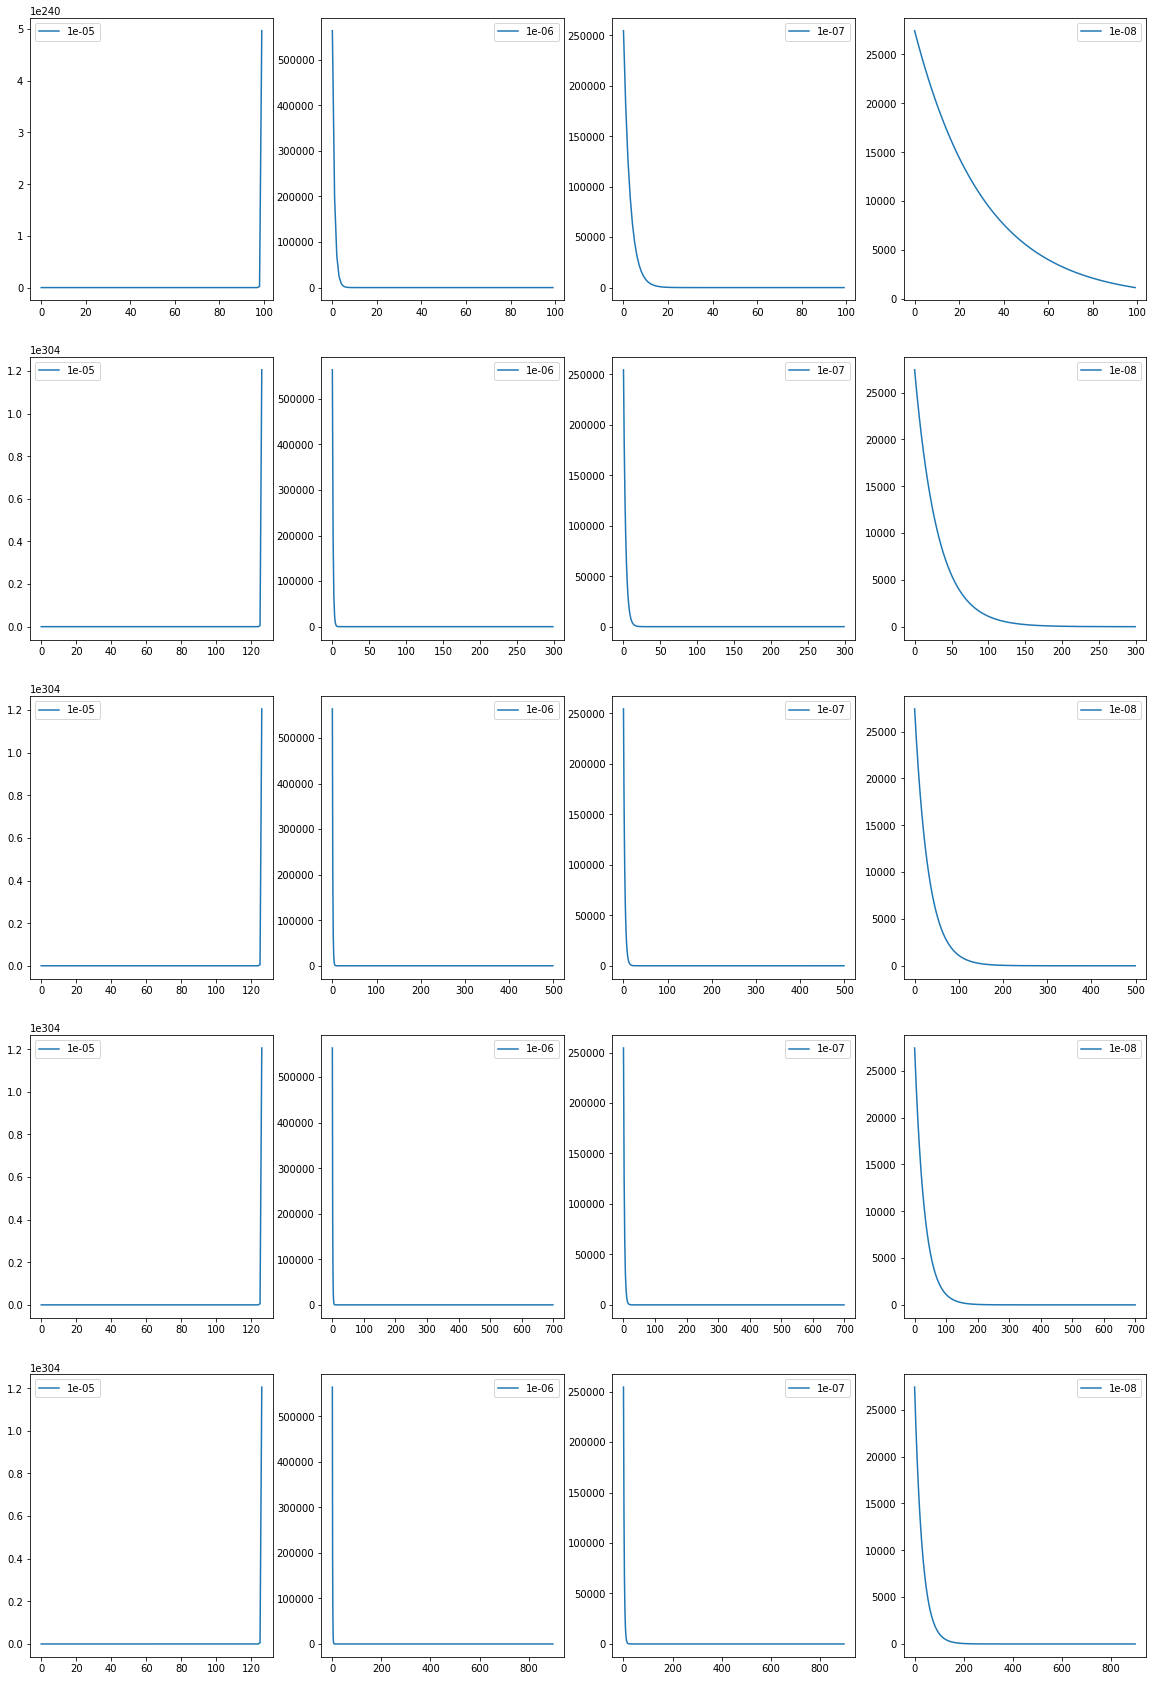

In [97]:
# plotint the result 
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,30.15))
mu  = [ 0.00001, 0.000001, 0.0000001, 0.00000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        Theta,  to_plot = learn_linreg_GD(X_air, Y_air,el ,itera,10**-6)
        lists =  to_plot.items() 
        x, y = zip(*lists)  
        ax[5-t][num].plot(x, y, label=el)
        ax[5-t][num].legend(loc='best')
    t-=1



#### Choice:
We notice that the function converge nicely  with learning rate= 0.000001, 0.0000001  

In [72]:
# Using the RMSE 
def RMSE(Y, Y_hat):
    return np.sqrt(sum((Y-Y_hat)**2)/len(Y))             

def minimize_GD_Rmse(X, Y, X_tes, Y_tes, para_init, lr, max_iter, e):
     
    to_plot = {}
    rmse    = {}
    for p in range(max_iter):
        
        f_ini         = lin_func(X,Y,para_init)
        
        rmse[p]       = RMSE(Y_tes, predict(X_tes, para_init)) 
        grad          = f_partial(X,Y, para_init)/len(Y)
        
        para_nex      = para_init + lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        val           = abs(f_ini - f_nex)
        to_plot[p]    = f_ini
        if  val < e:
            print("fix step converge at ", p)
            return   rmse,to_plot 
        
        para_init = para_nex
    return   rmse ,to_plot

def learn_linreg_GD_Rmse(X, Y, X_tes, Y_tes, lr, max_iter,e ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    ones_tes = np.ones(X_tes.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    X_tes = np.hstack([ones_tes, X_tes])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_Rmse(X,Y, X_tes, Y_tes, Theta_0,lr, max_iter,e)


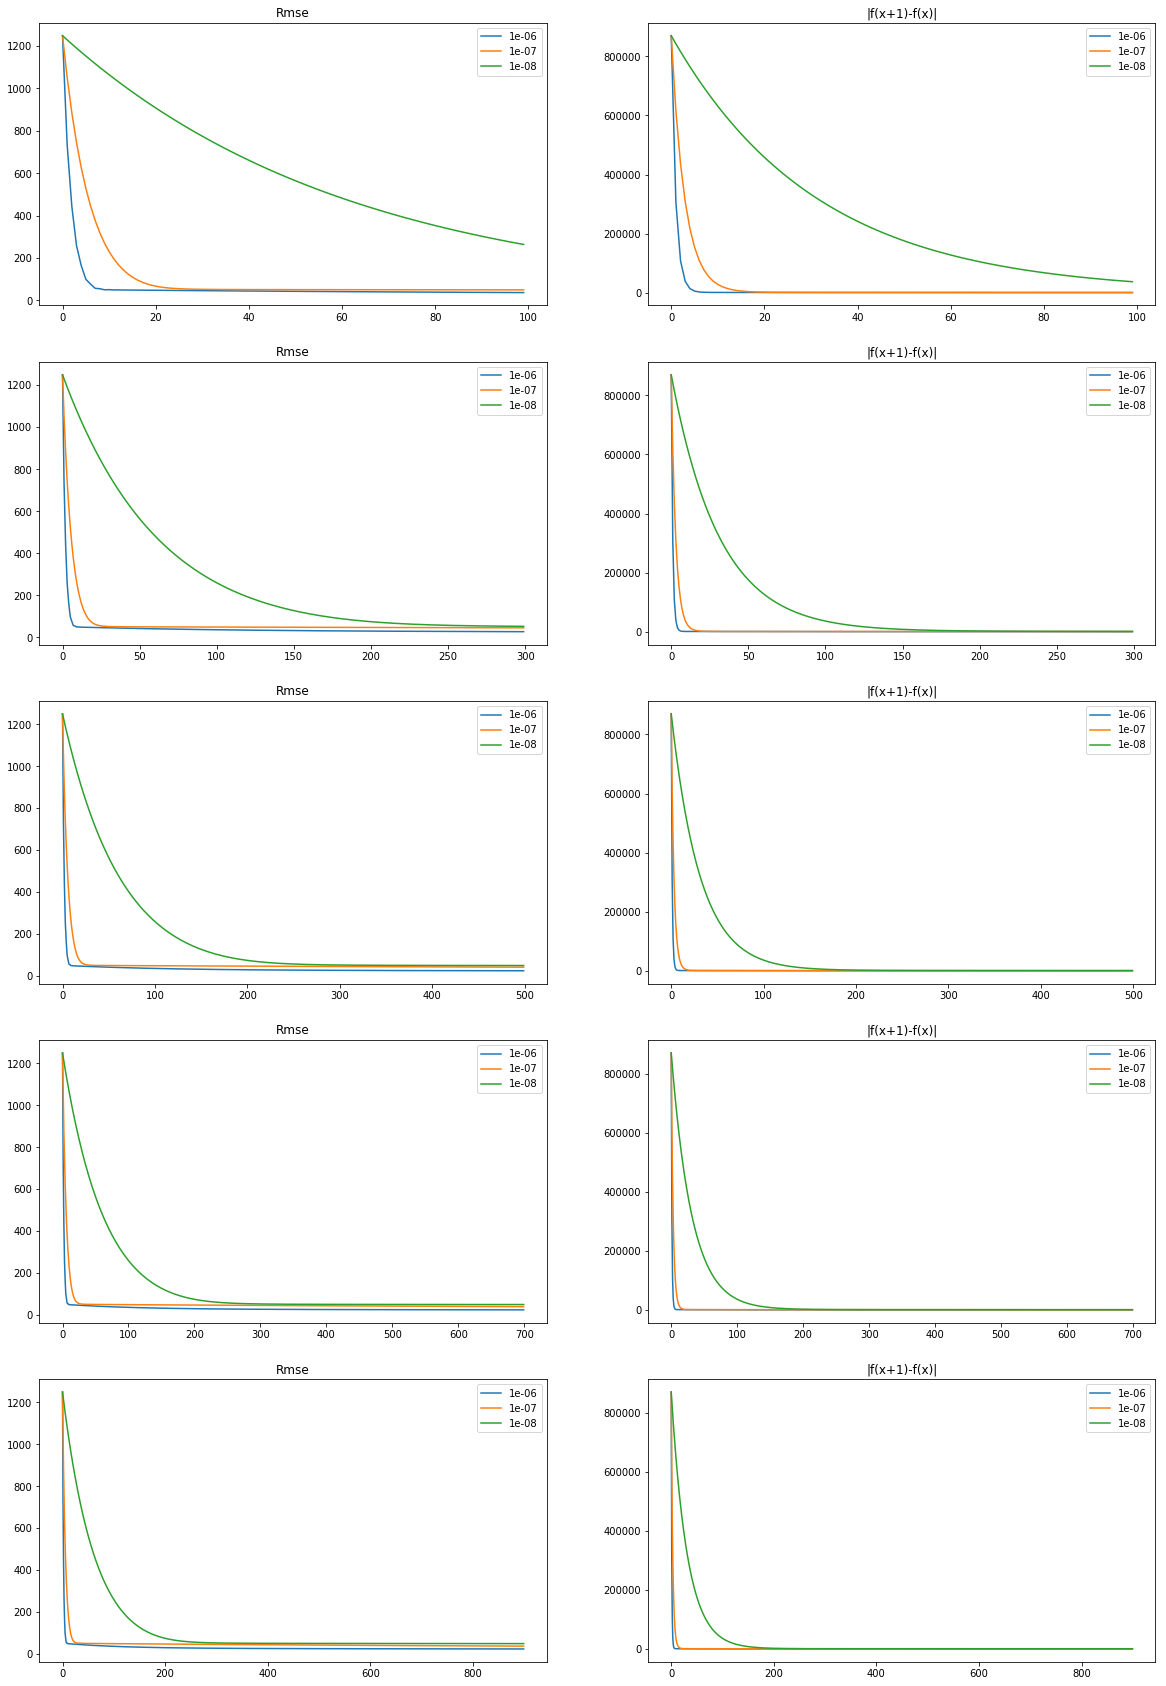

In [73]:
# plotint the result of the RMSE 
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,30.15))
mu  = [0.000001, 0.0000001, 0.00000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse ,to_plot= learn_linreg_GD_Rmse(X_air, Y_air,X_air_test, Y_air_test ,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[5-t][0].plot(x, y, label=el)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
    t-=1



Remark: 
We can observe that, with alpha = 0.000001 bothe the MLS and the RMSE converge nicely. 

#### Processing the Parkinson data set

/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add


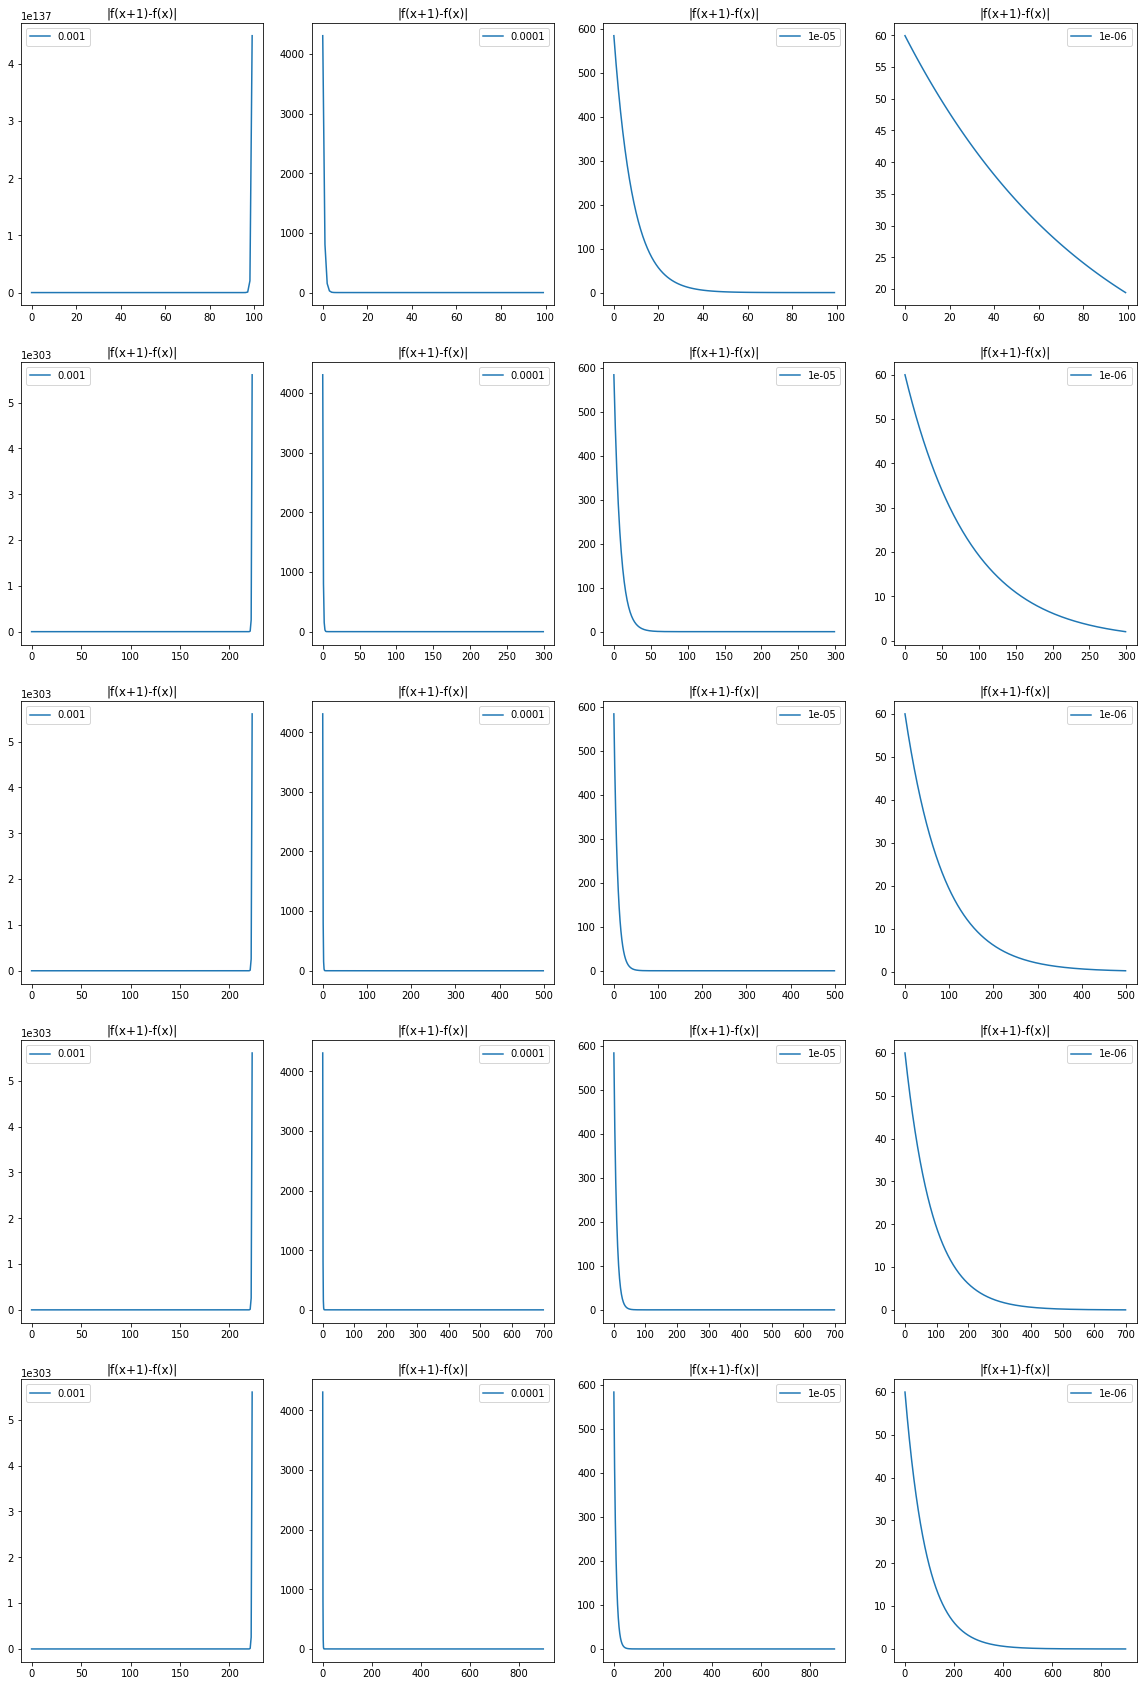

In [74]:
# plotint the result 
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,30.15))
mu  = [0.001, 0.0001, 0.00001, 0.000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        Theta,  to_plot = lea rn_linreg_GD(X_park,Y_park,el ,itera,10**-6)
        lists =  to_plot.items() 
        x, y = zip(*lists)  
        ax[5-t][num].plot(x, y, label=el)
        ax[5-t][num].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][num].legend(loc='best')
    t-=1


With learning rate = 0.0001, 0.00001, we notice nice convergence 

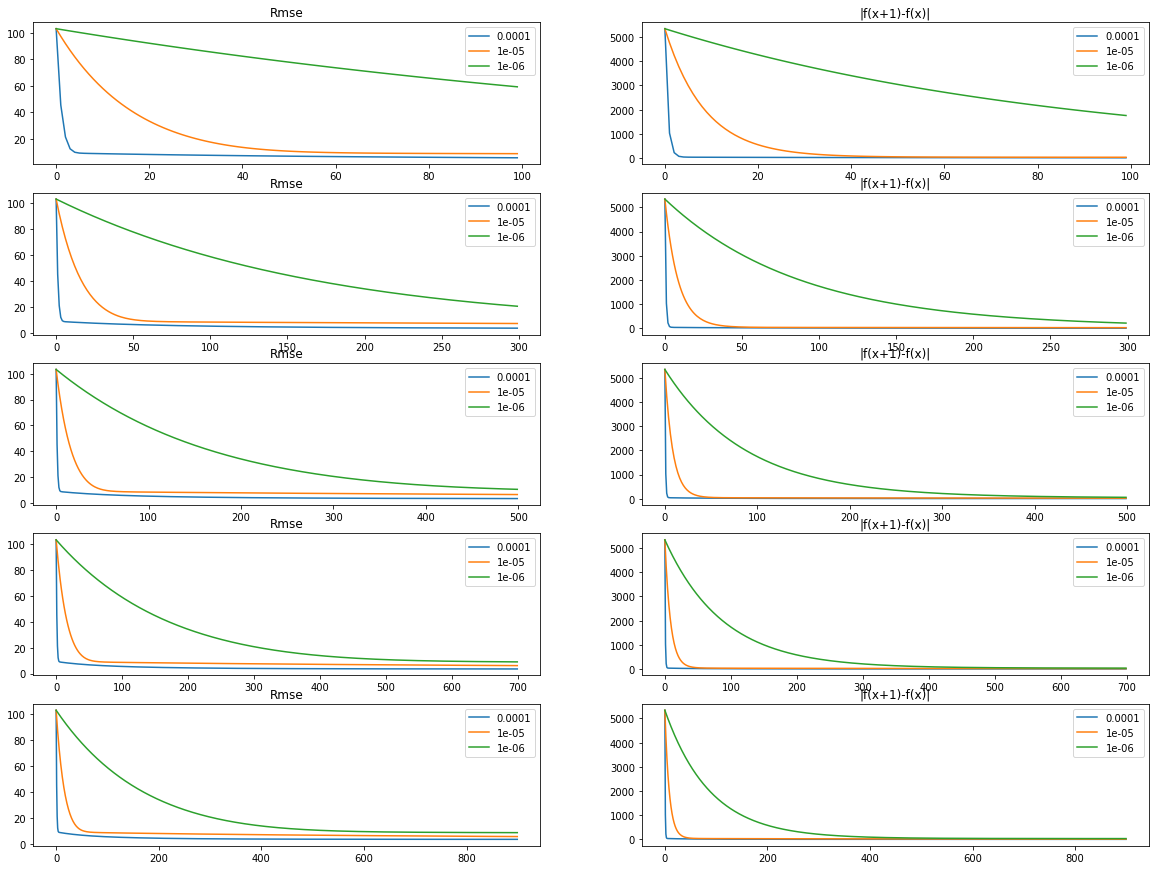

In [75]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,15.15))
mu  = [0.0001, 0.00001, 0.000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse, to_plot = learn_linreg_GD_Rmse(X_park, Y_park,X_park_test, Y_park_test ,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[5-t][0].plot(x, y, label=el)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
    t-=1




### Wine data processing 

/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Users/souayboubagayoko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in add


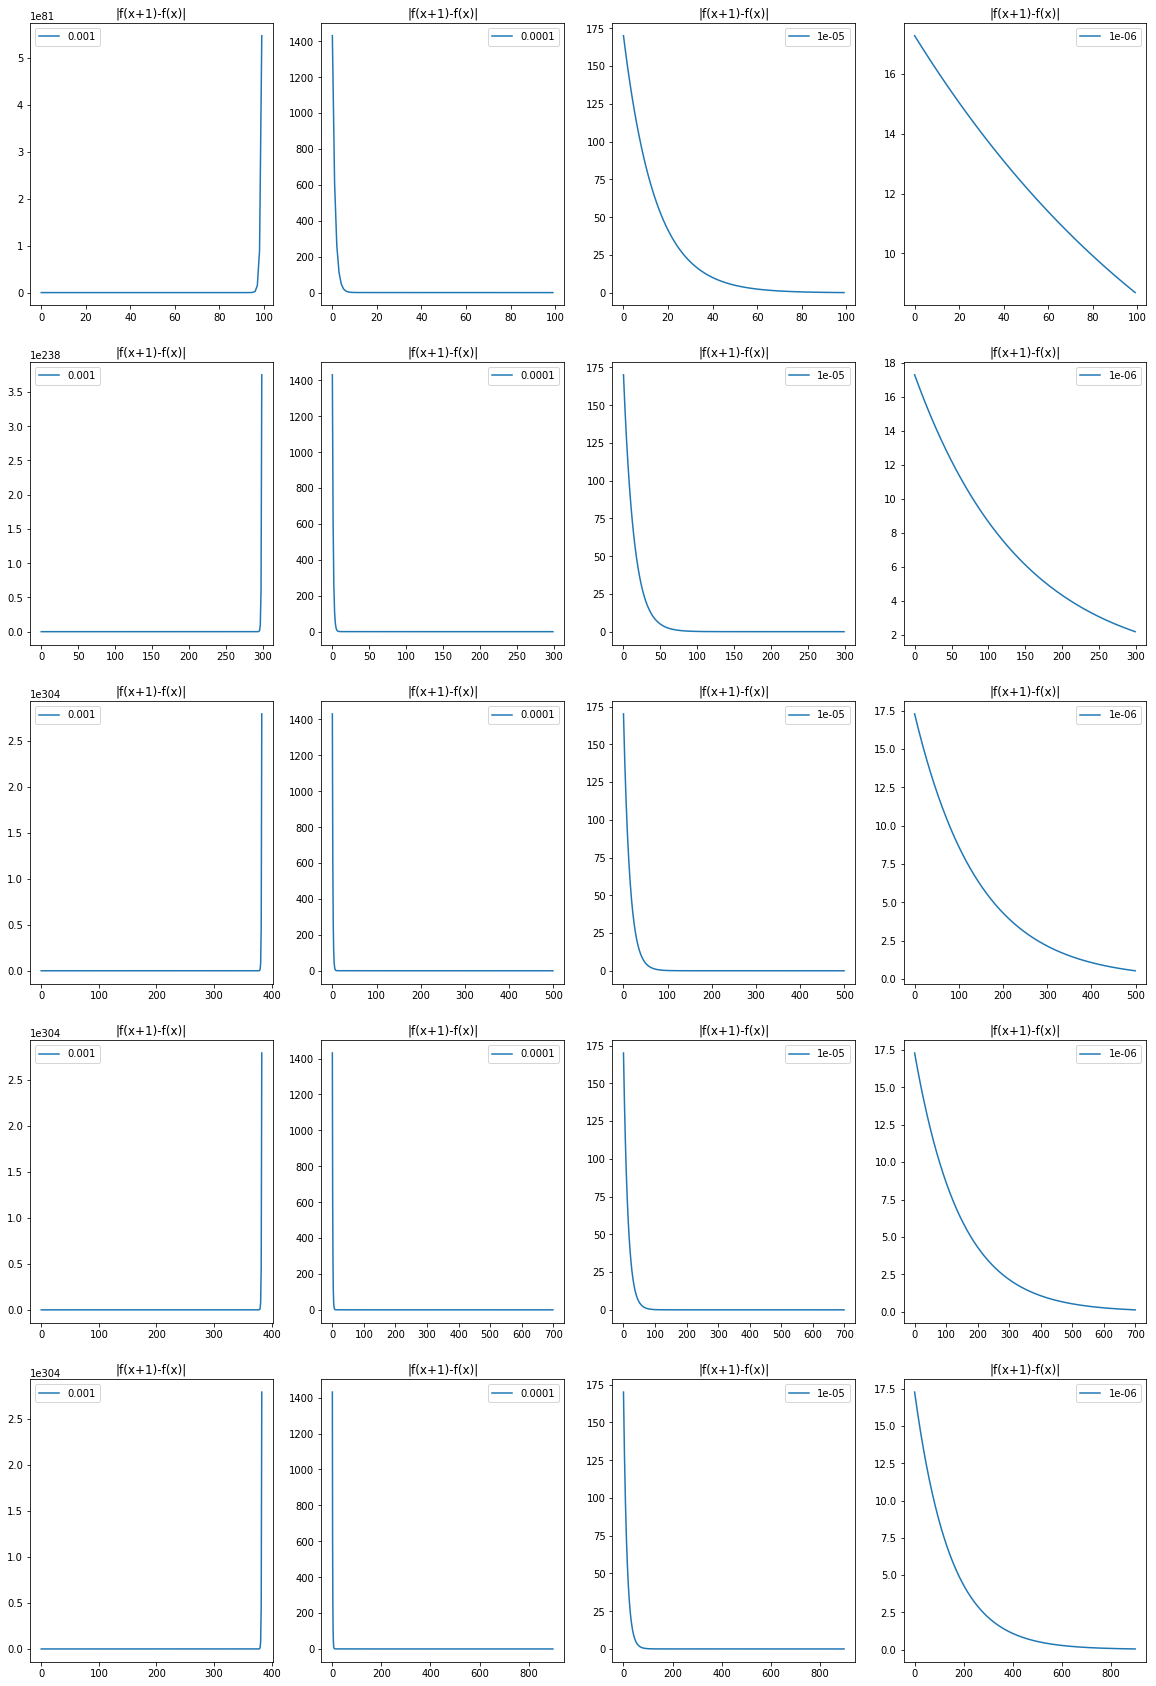

In [76]:
# plotint the result 
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,30.15))
mu  = [0.001, 0.0001, 0.00001, 0.000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        Theta,  to_plot = learn_linreg_GD(X_wine,Y_wine,el ,itera,10**-6)
        lists =  to_plot.items() 
        x, y = zip(*lists)  
        ax[5-t][num].plot(x, y, label=el)
        ax[5-t][num].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][num].legend(loc='best')
    t-=1



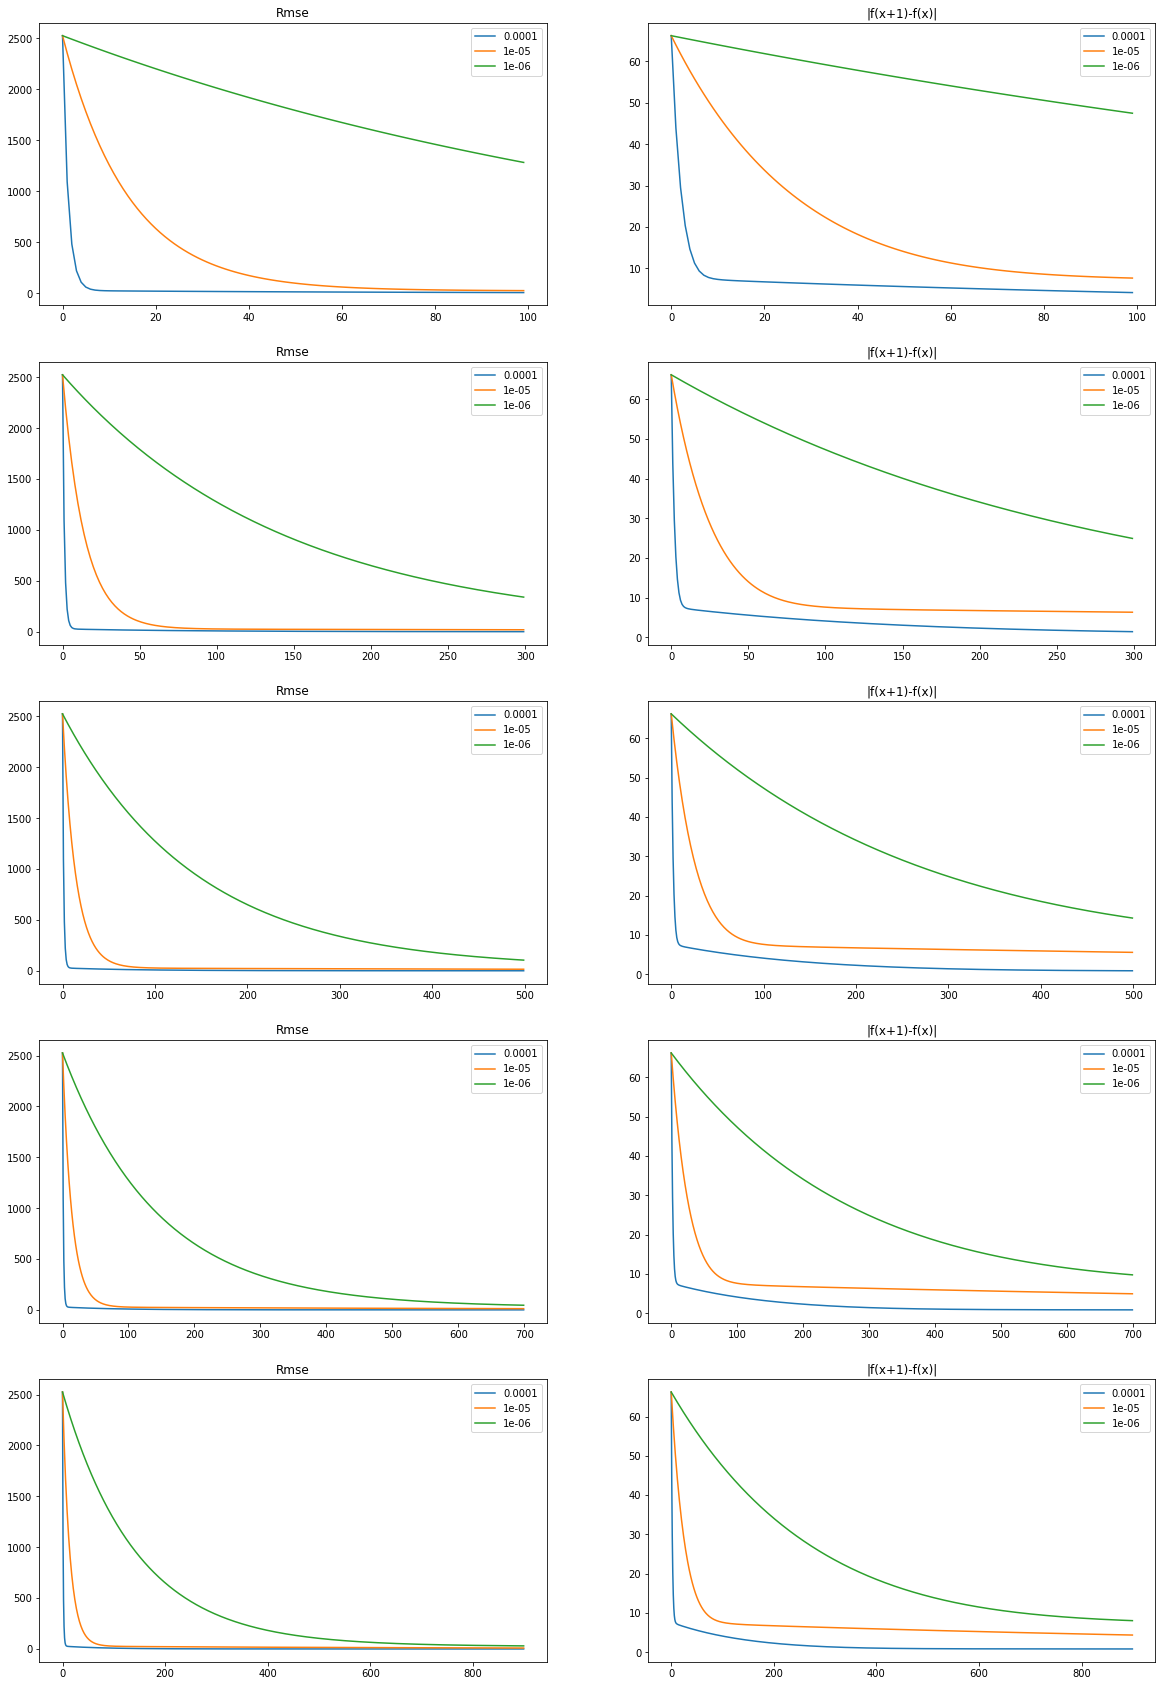

In [77]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,30.15))
mu  = [0.0001, 0.00001, 0.000001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        to_plot, rmse = learn_linreg_GD_Rmse(X_wine, Y_wine,X_wine_test, Y_wine_test ,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[5-t][0].plot(x, y, label=el)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
    t-=1




### Step Length for Gradient Descent

### Bactracking 

***Fitint the Air flight data***

In [78]:
# Line search using bactracking step size controller 

def backtracking(x,y, btha, loss, grad, alpha=0.2, b=0.5):
    mu =1 
    while loss(x,y,(btha + mu*grad)) > loss(x,y,btha)-alpha*mu*np.dot(grad.T, grad):
        mu *=b
    return mu

def minimize_GD_back(X, Y, para_init,lr, max_iter, e ):
     
    to_plot = {}
    
    for p in range(max_iter):
     
       
        f_ini         = lin_func(X,Y,para_init)
        grad          = f_partial(X,Y, para_init)/len(Y)
        lr            = backtracking(X,Y,para_init,lin_func, grad, alpha=0.2, b=0.5)
        para_nex      = para_init + lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        val           = abs(f_ini - f_nex)
        to_plot[p]    = val
        if  val < e:
            print('bactracking converge', p)
            return para_nex,  to_plot  
        
        para_init = para_nex
    return para_nex,   to_plot 

def learn_linreg_GD_back(X, Y,lr, max_iter,e ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_back(X,Y,Theta_0,lr, max_iter,e)





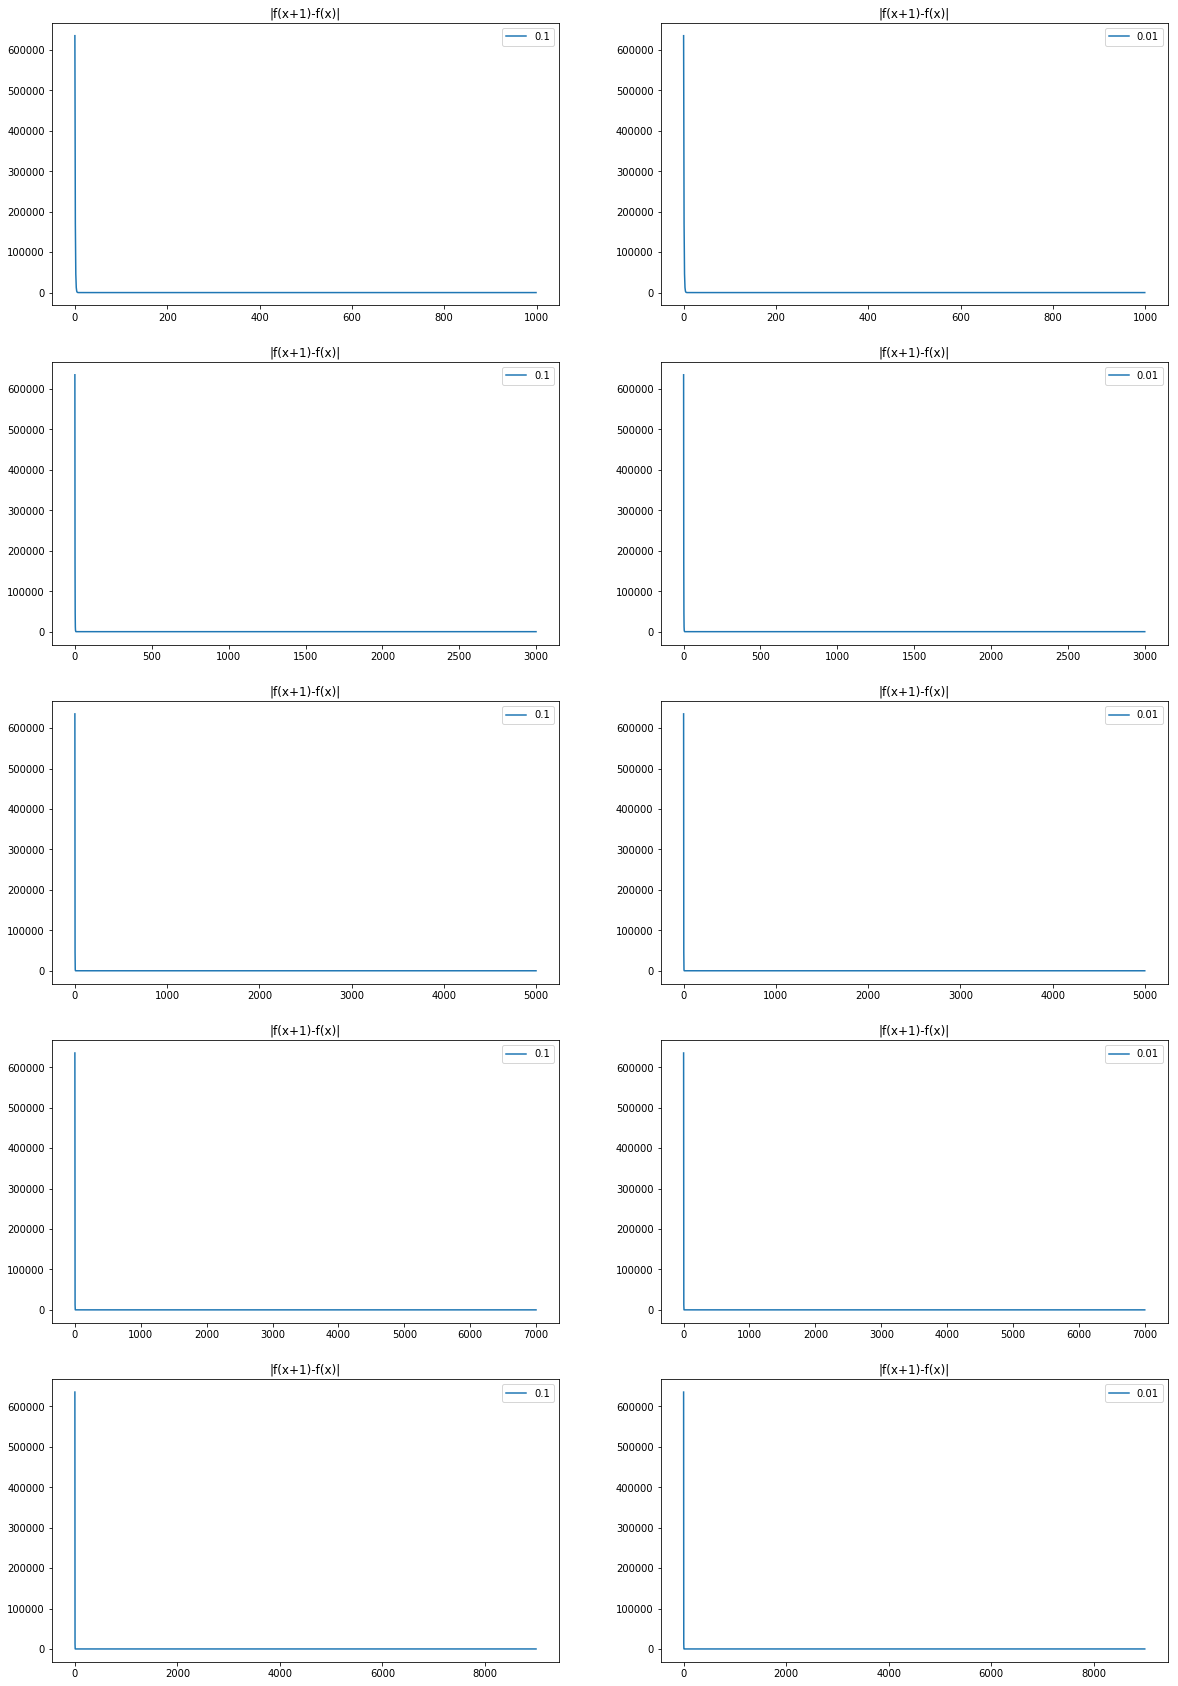

In [79]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,30.15))
mu  = [0.1, 0.01]       # i choose 5 step size 
t = 5
for itera in range(1000, 10000, 2000):
    for num, el in enumerate(mu):
        Theta,  to_plot = learn_linreg_GD_back(X_air,Y_air,el ,itera,10**-6)
        lists =  to_plot.items() 
        x, y = zip(*lists)  
        ax[5-t][num].plot(x, y, label=el)
        ax[5-t][num].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][num].legend(loc='best')
    t-=1



PLoting the RMSE 

In [80]:
def minimize_GD_back_Rmse(X, Y, X_tes, Y_tes, para_init,lr, max_iter, e ):
     
    to_plot = {}
    rmse    = {}
    for p in range(max_iter):
     
       
        f_ini         = lin_func(X,Y,para_init)
        grad          = f_partial(X,Y, para_init)/len(Y)
        rmse[p]       = RMSE(Y_tes, predict(X_tes, para_init))
        lr            = backtracking(X,Y,para_init,lin_func, grad, alpha=0.2, b=0.5)
        para_nex      = para_init + lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        val           = abs(f_ini - f_nex)
        to_plot[p]    = val
        if  val < e:
            print('bactracking converge', p)
            return rmse,  to_plot  
        
        para_init = para_nex
    return rmse, to_plot 

def learn_linreg_GD_back_Rmse(X, Y,X_tes, Y_tes, lr, max_iter,e ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    ones_tes = np.ones(X_tes.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    X_tes = np.hstack([ones_tes, X_tes])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_back_Rmse(X,Y,X_tes, Y_tes, Theta_0,lr, max_iter,e)



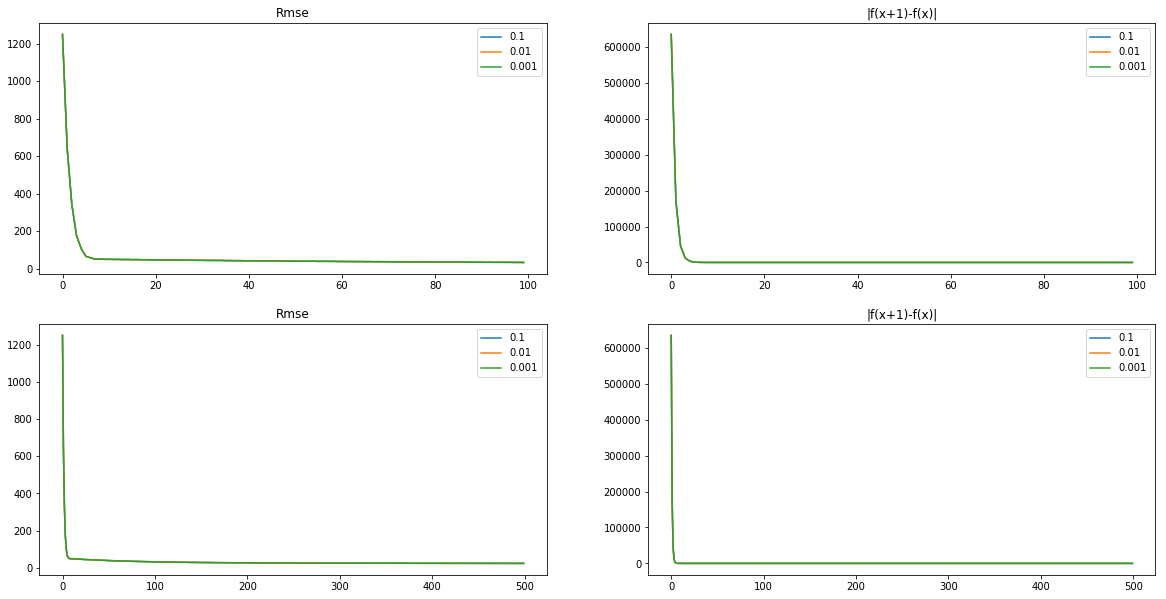

In [81]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 2
for itera in range(100, 900, 400):
    for num, el in enumerate(mu):
        rmse ,to_plot = learn_linreg_GD_back_Rmse(X_air, Y_air,X_air_test, Y_air_test,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[2-t][0].plot(x, y, label=el)
        ax[2-t][0].title.set_text('Rmse')
        ax[2-t][1].plot(x1, y1, label=el)
        ax[2-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[2-t][0].legend(loc='best')
        ax[2-t][1].legend(loc='best')
    t-=1



***Fiting the Parkinson dataset using the backtracking step size controller***

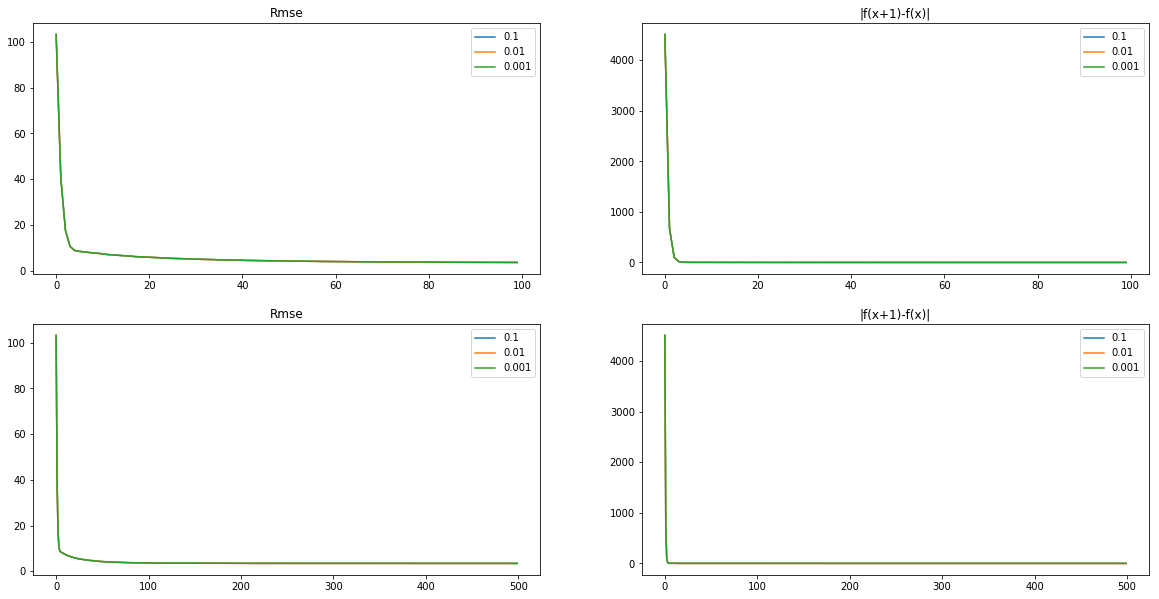

In [82]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 2
for itera in range(100, 900, 400):
    for num, el in enumerate(mu):
        rmse ,to_plot = learn_linreg_GD_back_Rmse(X_park, Y_park,X_park_test, Y_park_test,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[2-t][0].plot(x, y, label=el)
        ax[2-t][0].title.set_text('Rmse')
        ax[2-t][1].plot(x1, y1, label=el)
        ax[2-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[2-t][0].legend(loc='best')
        ax[2-t][1].legend(loc='best')
    t-=1




***Fiting the Wine dataset using the backtracking step size controller***

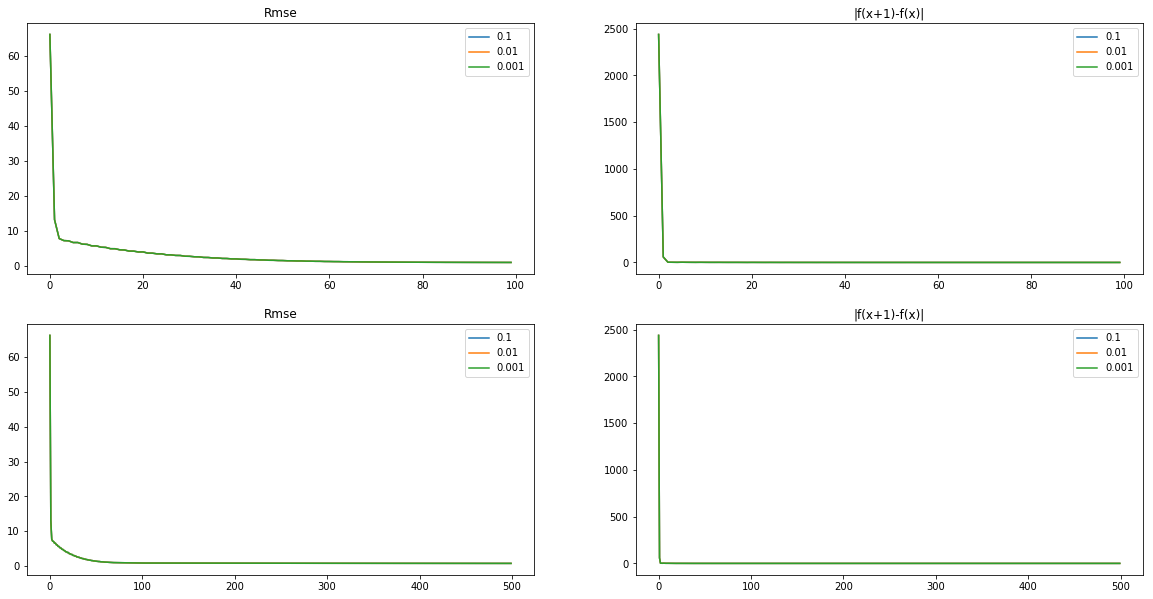

In [83]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 2
for itera in range(100, 900, 400):
    for num, el in enumerate(mu):
        rmse ,to_plot = learn_linreg_GD_back_Rmse(X_wine, Y_wine,X_wine_test, Y_wine_test,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[2-t][0].plot(x, y, label=el)
        ax[2-t][0].title.set_text('Rmse')
        ax[2-t][1].plot(x1, y1, label=el)
        ax[2-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[2-t][0].legend(loc='best')
        ax[2-t][1].legend(loc='best')
    t-=1





### Using Bolddriver step size controller 

In [84]:
# Line search 

def bolddriver(x, y, btha,loss, grad, mu_old ):
    mu = mu_old*1.1
    while loss(x,y,btha) - loss(x,y,(btha + mu*grad)) < 0:
        mu = mu*0.5
    
    return mu


def minimize_GD_bold(X, Y, X_tes, Y_tes, para_init,lr, max_iter, e ):
     
    to_plot = {}
    rmse    = {}
    for p in range(max_iter):
        rmse[p]       = RMSE(Y_tes, predict(X_tes, para_init)) 
        f_ini         = lin_func(X,Y,para_init)
        grad          = f_partial(X,Y, para_init)/len(Y)
        lr            = bolddriver(X,Y,para_init,lin_func, grad, lr)
        para_nex      = para_init +lr*grad
        f_nex         = lin_func(X,Y, para_nex)
        val           = abs(f_ini - f_nex)
        to_plot[p]    = val
        if  val < e:
            print('bolddriver converge', p)
            return rmse, to_plot
        
        para_init = para_nex
    return rmse, to_plot   

def learn_linreg_GD_bold(X, Y,X_tes, Y_tes,lr, max_iter,e ):
    "Fit the model and return Theta values"
    ones = np.ones(X.shape[0]).reshape(-1,1)
    ones_tes = np.ones(X_tes.shape[0]).reshape(-1,1)
    X = np.hstack([ones, X])
    X_tes = np.hstack([ones_tes, X_tes])
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    Theta_0  = np.ones(X.shape[1]).reshape(-1,1)  # the dimention of theta = number of features
    
    return minimize_GD_bold(X,Y,X_tes, Y_tes, Theta_0,lr, max_iter,e)


***fiting the Air flight data set***

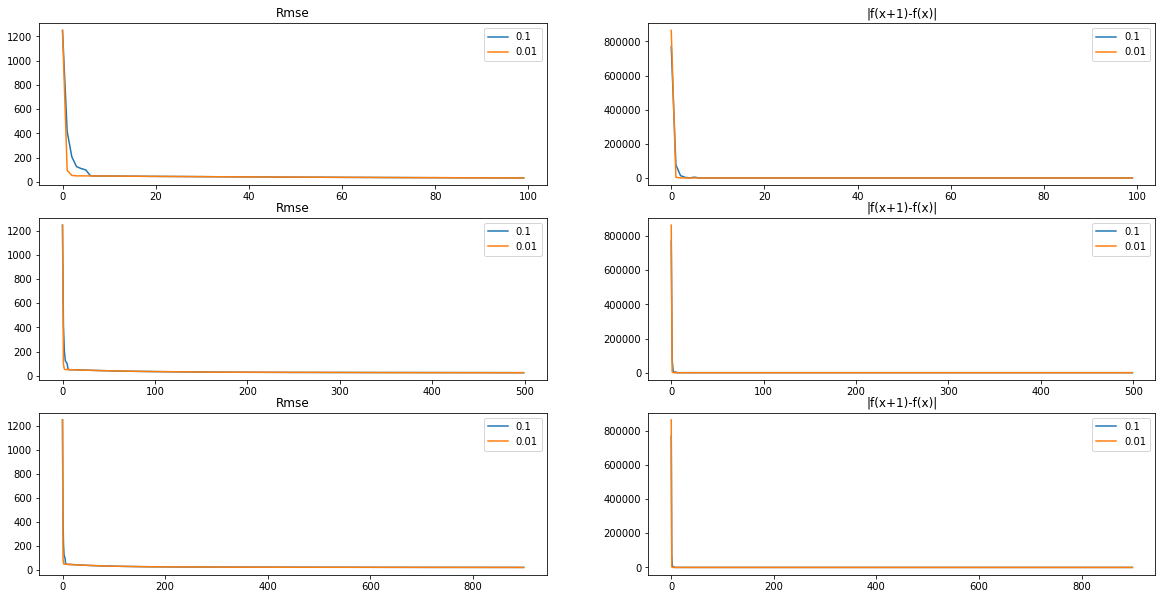

In [85]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10.15))
mu  = [0.1, 0.01]       # i choose 5 step size 
t = 2
for itera in range(100, 1000, 400):
    for num, el in enumerate(mu):
        rmse1 ,to_plot1 = learn_linreg_GD_bold(X_air, Y_air,X_air_test, Y_air_test,el,itera,10**-6)
        lists =  rmse1.items() 
        lists1 =  to_plot1.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[2-t][0].plot(x, y, label=el)
        ax[2-t][0].title.set_text('Rmse')
        ax[2-t][1].plot(x1, y1, label=el)
        ax[2-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[2-t][0].legend(loc='best')
        ax[2-t][1].legend(loc='best')
    t-=1


***fiting the parkinson Data set

bolddriver converge 467


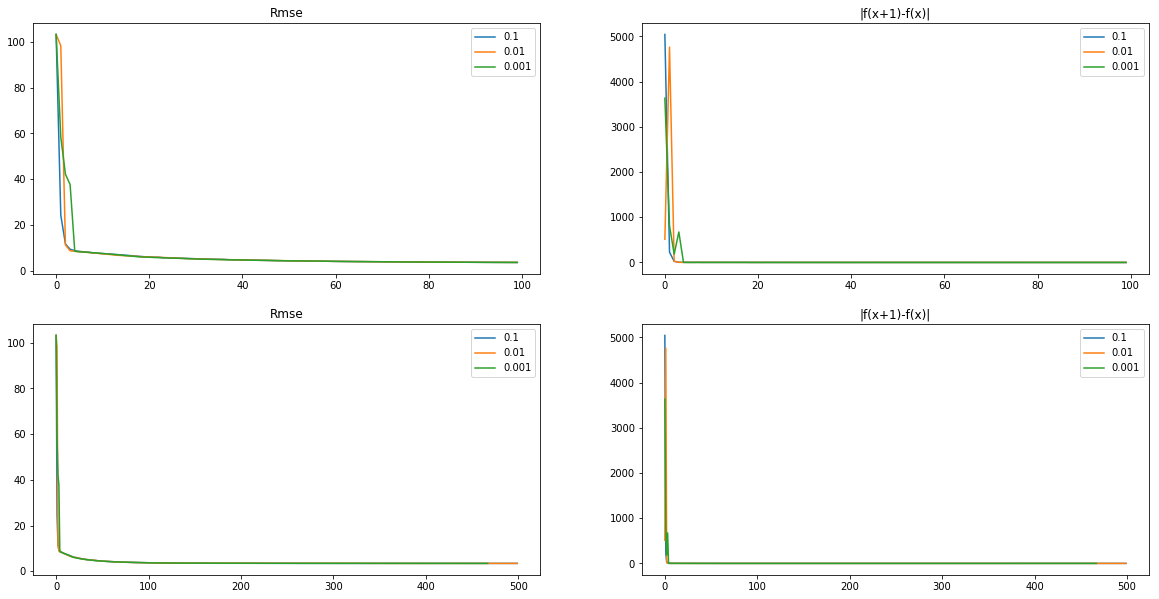

In [86]:
# plotint the result of the RMSE for the Parkinson data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 2
for itera in range(100, 900, 400):
    for num, el in enumerate(mu):
        rmse ,to_plot = learn_linreg_GD_bold(X_park, Y_park,X_park_test, Y_park_test,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[2-t][0].plot(x, y, label=el)
        ax[2-t][0].title.set_text('Rmse')
        ax[2-t][1].plot(x1, y1, label=el)
        ax[2-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[2-t][0].legend(loc='best')
        ax[2-t][1].legend(loc='best')
    t-=1


***Fiting the Wine data***

bolddriver converge 741


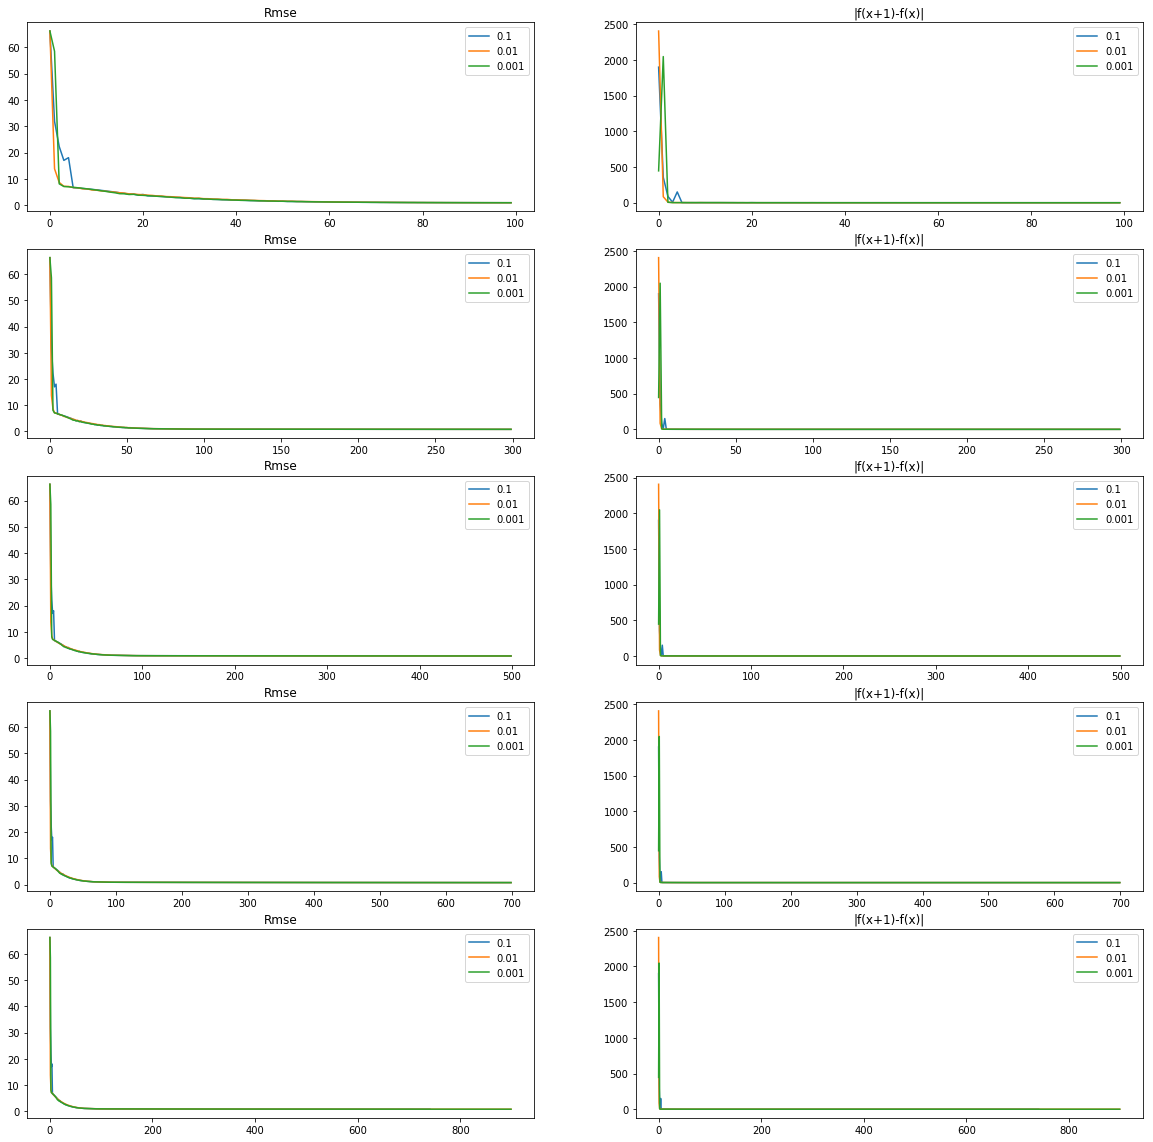

In [87]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,20.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse ,to_plot = learn_linreg_GD_bold(X_wine, Y_wine,X_wine_test, Y_wine_test ,el,itera,10**-6)
        lists =  rmse.items() 
        lists1 =  to_plot.items() 
        x, y = zip(*lists)
        x1, y1 = zip(*lists1)
        ax[5-t][0].plot(x, y, label=el)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('|f(x+1)-f(x)|')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
    t-=1




Compare different step length algorithms Compare the RMSE graphs of f ixed − step − length, step − length − backtracking and step − length − bolddriver. 

#### Comparing the RMSE 

***For the wine data set***

bolddriver converge 741


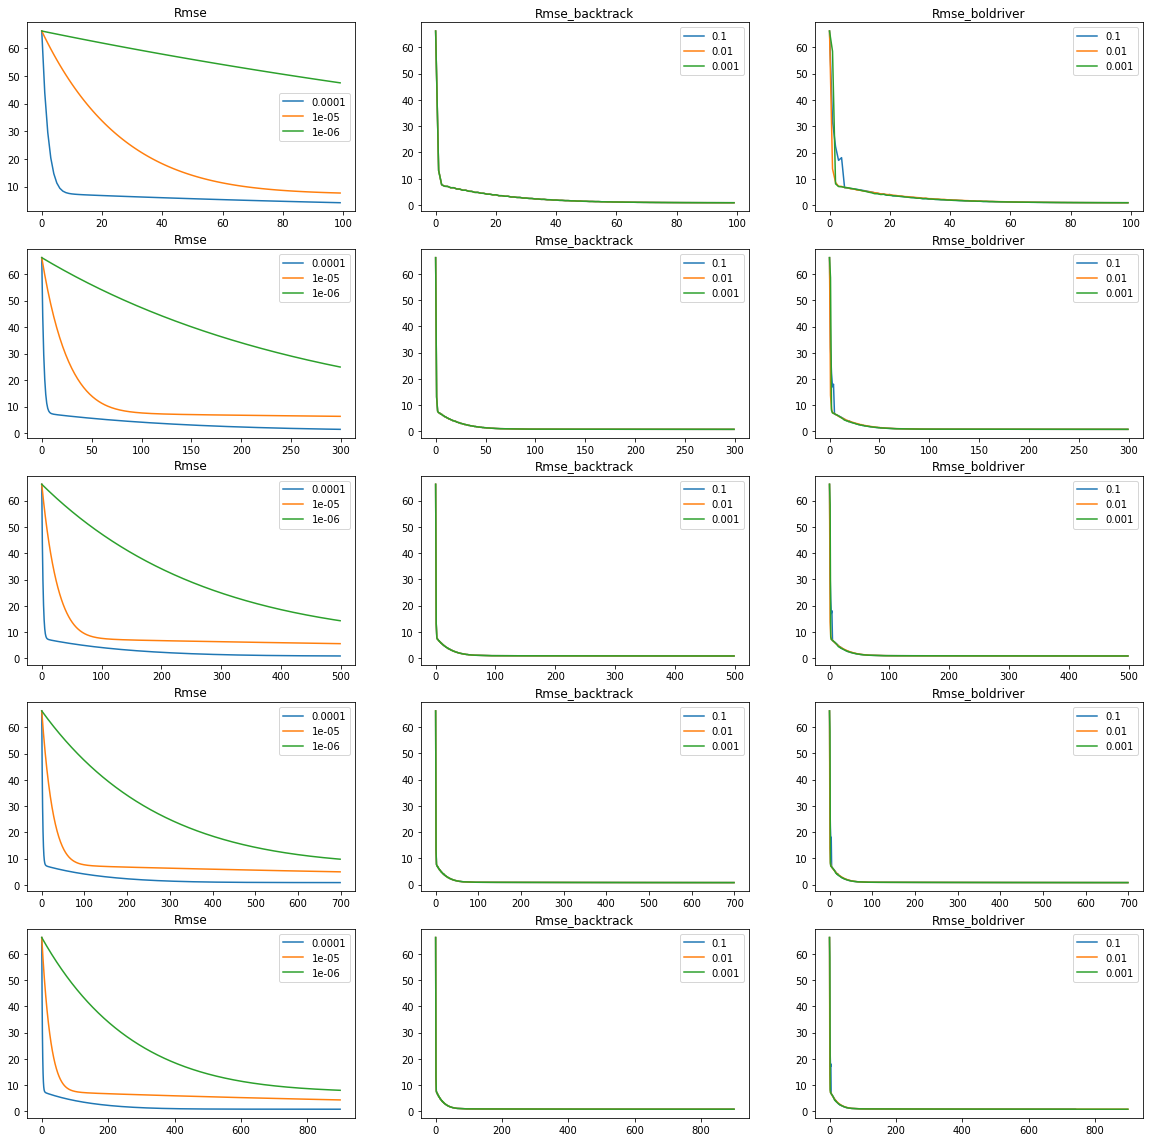

In [88]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse ,to_plot   = learn_linreg_GD_Rmse(X_wine, Y_wine,X_wine_test, Y_wine_test ,el/1000,itera,10**-6)
        rmse1 ,to_plot1 = learn_linreg_GD_back_Rmse(X_wine, Y_wine,X_wine_test, Y_wine_test ,el,itera,10**-6)
        rmse2 ,to_plot2  = learn_linreg_GD_bold(X_wine, Y_wine,X_wine_test, Y_wine_test ,el,itera,10**-6)
        lists   =  rmse.items() 
        lists1  =  rmse1.items() 
        lists2  = rmse2.items()
        x, y    = zip(*lists)
        x1, y1  = zip(*lists1)
        x2, y2  = zip(*lists2)
        ax[5-t][0].plot(x, y, label=el/1000)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('Rmse_backtrack')
        ax[5-t][2].plot(x2, y2, label=el)
        ax[5-t][2].title.set_text('Rmse_boldriver')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
        ax[5-t][2].legend(loc='best')
    t-=1

WE remark that within fewer iteration and independant of the learning rate,  the RMSE in the backtracking and the bolddriver converge ( at around 100 iteration) , whereas in the fix stepsize the convergence is much slower

***Parkinsone Data***

bolddriver converge 467
bolddriver converge 600
bolddriver converge 467
bolddriver converge 830
bolddriver converge 600
bolddriver converge 467


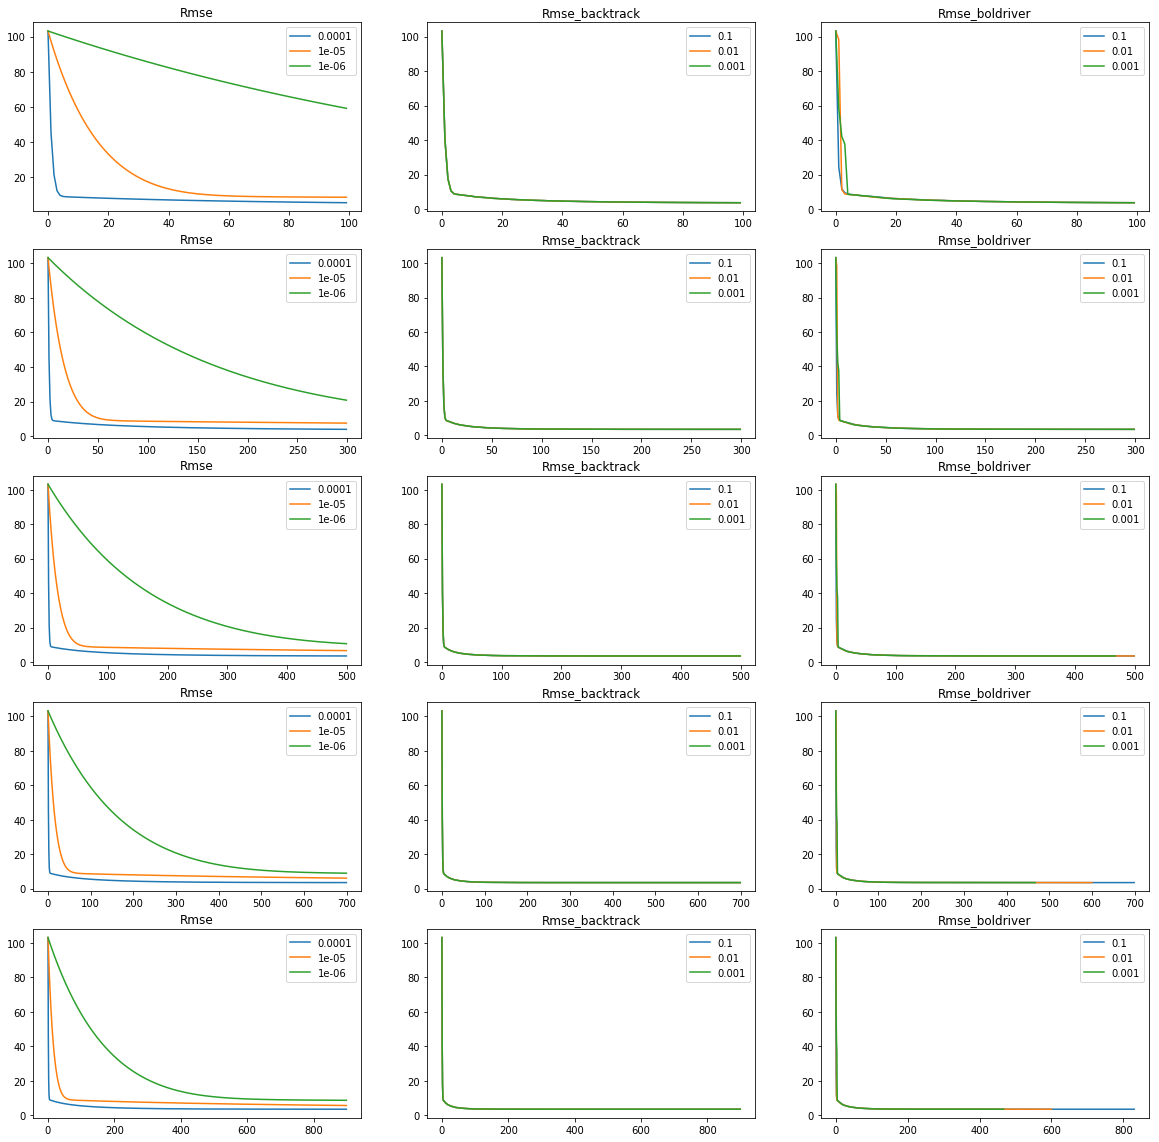

In [89]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse ,to_plot   = learn_linreg_GD_Rmse(X_park, Y_park,X_park_test, Y_park_test ,el/1000,itera,10**-6)
        rmse1 ,to_plot1 = learn_linreg_GD_back_Rmse(X_park, Y_park,X_park_test, Y_park_test ,el,itera,10**-6)
        rmse2 ,to_plot2  = learn_linreg_GD_bold(X_park, Y_park,X_park_test, Y_park_test ,el,itera,10**-6)
        lists   =  rmse.items() 
        lists1  =  rmse1.items() 
        lists2  = rmse2.items()
        x, y    = zip(*lists)
        x1, y1  = zip(*lists1)
        x2, y2  = zip(*lists2)
        ax[5-t][0].plot(x, y, label=el/1000)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('Rmse_backtrack')
        ax[5-t][2].plot(x2, y2, label=el)
        ax[5-t][2].title.set_text('Rmse_boldriver')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
        ax[5-t][2].legend(loc='best')
    t-=1

***Air flight data***

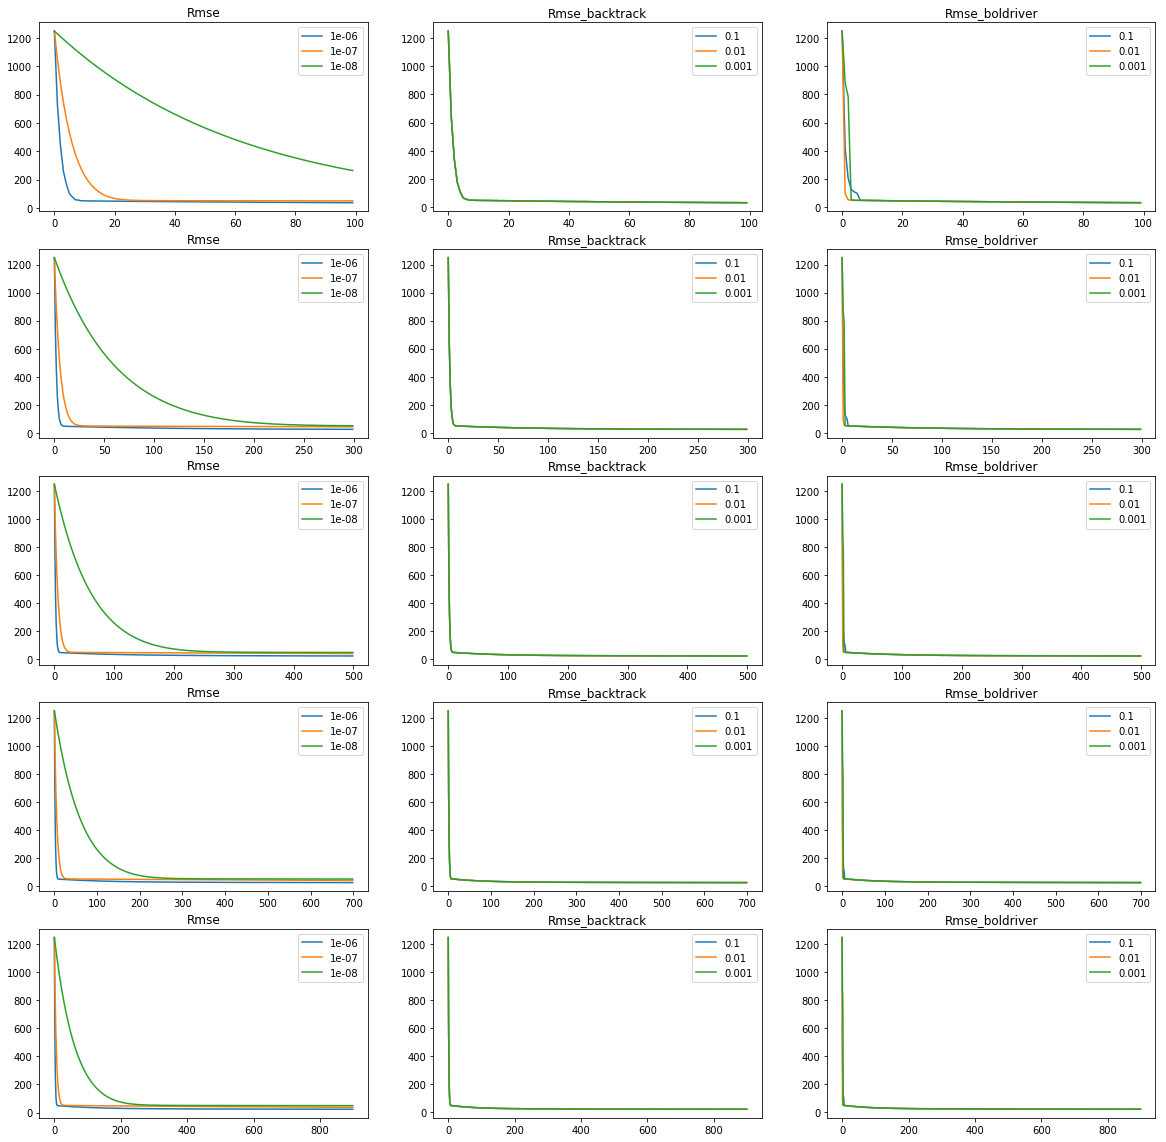

In [93]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20,20.15))
mu  = [0.1, 0.01, 0.001]       # i choose 5 step size 
t = 5
for itera in range(100, 1000, 200):
    for num, el in enumerate(mu):
        rmse ,to_plot   = learn_linreg_GD_Rmse(X_air, Y_air,X_air_test, Y_air_test ,el/100000,itera,10**-6)
        rmse1 ,to_plot1 = learn_linreg_GD_back_Rmse(X_air, Y_air,X_air_test, Y_air_test ,el,itera,10**-6)
        rmse2 ,to_plot2  = learn_linreg_GD_bold(X_air, Y_air,X_air_test, Y_air_test,el,itera,10**-6)
        lists   =  rmse.items() 
        lists1  =  rmse1.items() 
        lists2  = rmse2.items()
        x, y    = zip(*lists)
        x1, y1  = zip(*lists1)
        x2, y2  = zip(*lists2)
        ax[5-t][0].plot(x, y, label=el/100000)
        ax[5-t][0].title.set_text('Rmse')
        ax[5-t][1].plot(x1, y1, label=el)
        ax[5-t][1].title.set_text('Rmse_backtrack')
        ax[5-t][2].plot(x2, y2, label=el)
        ax[5-t][2].title.set_text('Rmse_boldriver')
        ax[5-t][0].legend(loc='best')
        ax[5-t][1].legend(loc='best')
        ax[5-t][2].legend(loc='best')
    t-=1

Overall we notice the bactracking and the bolddriver performe better in term of quick minimization, in addition the bolddriver outpace backtracking as well.